In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Vince Misalucha/Downloads/sell_coordinates/sell_1802.csv")
df.head()

,id,operation,property_type,place_name,state_name,lat,lon,surface_covered_in_m2,floor,rooms,price
0,642177c66e5cd1f39af9887fd68788de3ec84870,sell,apartment,Aquiraz,Ceará,-3.838596,-38.395409,37,3,1,200000.0
1,a7a391546a4f46f8a707861aae721e21364c308b,sell,apartment,Aquiraz,Ceará,-3.838382,-38.395873,37,3,1,180000.0
2,f1702ed50626c84fb2dc9dcf50bcc2f2557c8aa3,sell,apartment,Aquiraz,Ceará,-3.838617,-38.395390,56,3,2,380000.0
3,fd667e7524131792b76dfdaddad12c30c8280b71,sell,apartment,Santa Catarina,Santa Catarina,-27.242339,-50.218856,135,3,3,350000.0
4,c9807d1b79ebd399fa16e822631dcf0a2866f14f,sell,apartment,Santa Catarina,Santa Catarina,-27.242339,-50.218856,65,2,1,185000.0


In [3]:
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

In [4]:
states = sorted(list(df['state_name'].unique()))
states

['Bahia',
 'Ceará',
 'Espírito Santo',
 'Goiás',
 'Paraná',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Santa Catarina',
 'São Paulo']

In [5]:
p_type = sorted(list(df['property_type'].unique()))
p_type

['apartment', 'house', 'store']

In [6]:
br_house = df[(df.property_type == 'house')]
br_house ['price_quartile'] = pd.qcut(br_house['price'], 4, labels=False)
br_house ['size_percentile'] = pd.qcut(br_house['surface_covered_in_m2'], 10, labels=False)
br_house

C:\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,operation,property_type,place_name,state_name,lat,lon,surface_covered_in_m2,floor,rooms,price,price_quartile,size_percentile
28,0089badfd737c52dbc367a962618e2eaf2c0adba,sell,house,Senador Canedo,Goiás,-16.708196,-49.080108,67,1,2,145000.0,0,0
101,567c2fb46e86ba128e57966b5b74e10b427621b5,sell,house,Aparecida de Goiânia,Goiás,-16.801974,-49.324109,106,1,3,350000.0,0,1
241,0cd71ebe7c9e7de08f9a46543b3979b7728a9025,sell,house,Anil,Rio de Janeiro,-22.951729,-43.328271,414,2,3,1700000.0,1,7
246,da37705ea9b93f87085781f75586a4f78129fd1b,sell,house,Anil,Rio de Janeiro,-22.957844,-43.334926,520,2,2,1495000.0,1,8
247,42d84437311e25e4c3a56290f1bc90746b826461,sell,house,Anil,Rio de Janeiro,-22.962657,-43.331888,709,2,3,2500000.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,0d6af97eea9b9de4c0a5c5749fb579d1118862e7,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.015049,-43.484823,280,1,1,750000.0,0,5
7072,ecae97bfb6177c458d26743dbd6afb4fe7f202eb,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.016957,-43.492348,390,3,1,2100000.0,2,7
7073,86a6455958b6a00cab10c6731d5f292927f687c2,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.016957,-43.492348,300,3,1,1500000.0,1,5
7074,60358f9b212cee5df59b00155905bed6ddcc8f44,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.016957,-43.492348,380,3,2,3000000.0,2,7


## Housing Volume per State

In [7]:
import matplotlib.pyplot as plt

In [8]:
vol_house = br_house.groupby('state_name')['id'].count().sort_values(ascending=False)
pd.DataFrame(vol_house)

,id
state_name,
Rio de Janeiro,119
Goiás,2


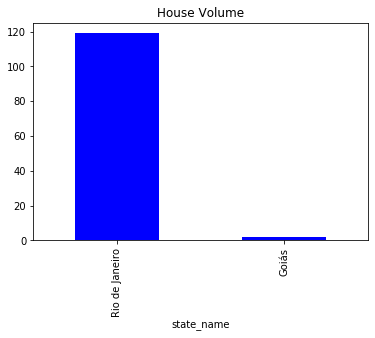

In [9]:
vol_house.plot(kind='bar', color='blue', title='House Volume')

## Housing Average Price per State

In [10]:
price_house = br_house.groupby('state_name')['price'].mean().sort_values(ascending=False)
pd.DataFrame(price_house.round(2))

,price
state_name,
Rio de Janeiro,2787798.24
Goiás,247500.00


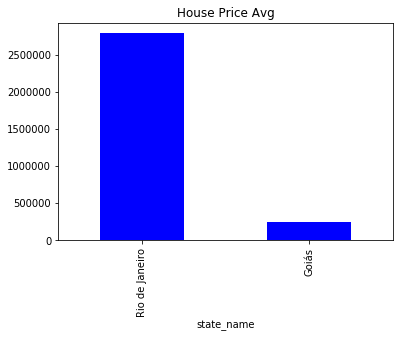

In [11]:
price_house.plot(kind='bar', color='blue', title = 'House Price Avg')

## Correlation of Numerical Features

In [12]:
import seaborn as sns

In [13]:
br_num_features = br_house.iloc[:, 5:-2]
br_num_features.corr()

,lat,lon,surface_covered_in_m2,floor,rooms,price
lat,1.000000,-0.954284,-0.068422,-0.011678,0.016420,-0.117335
lon,-0.954284,1.000000,0.045528,-0.000447,0.030223,0.099063
surface_covered_in_m2,-0.068422,0.045528,1.000000,-0.038567,0.120627,0.673911
floor,-0.011678,-0.000447,-0.038567,1.000000,-0.062161,-0.059607
rooms,0.016420,0.030223,0.120627,-0.062161,1.000000,0.291653
price,-0.117335,0.099063,0.673911,-0.059607,0.291653,1.000000


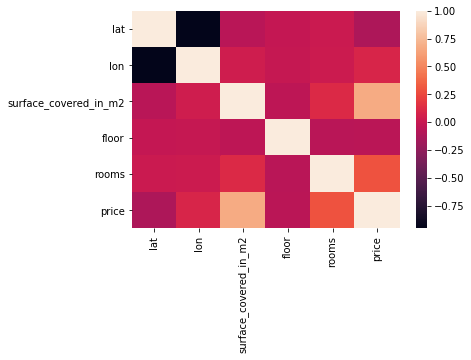

In [14]:
sns.heatmap(br_num_features.corr());

## Interactive Magnitude Marker Map

In [15]:
colordict = {0: 'blue', 1: 'green', 2: 'orange', 3: 'red'}
sizedict = {0: 4.5, 1: 5, 2: 5.5, 3: 6, 4: 6.5, 5: 7, 6: 7.5, 7: 8, 8: 8.5, 9: 9, 10: 9.5 }
def cmarker_map(data, init_lat, init_lon):
    
    map_out = folium.Map(location=[init_lat, init_lon], zoom_start = 12)
    for id, lat, lon, place, state, price_q, size, size_per, price in zip(data['id'], data['lat'], data['lon'], data['place_name'], data['state_name'],
                                                data['price_quartile'], data['surface_covered_in_m2'], data['size_percentile'], data['price']):
        folium.CircleMarker(
            [lat, lon],
            radius= sizedict[size_per],
            popup = ('Place: ' + str(place) + '<br>'
                     'State: ' + str(state) + '<br>'
                     'Price: ' + 'BRL' + str(price) + '<br>'
                     'SqM: ' + str(size) + '<br>'
                     'XY: ' + str(lat)+',' + str(lon) + '<br>'
                     'ID: ' + str(id) + '<br>'
                    ),
            
            color='b',
            key_on = size_per,
            threshold_scale=[0,1,2,3],
            fill_color=colordict[price_q],
            fill=True,
            fill_opacity=0.8
        ).add_to(map_out)
    
    return map_out

In [16]:
house_map = cmarker_map(br_house, -22.9068, -43.1729)
house_map

#### Data Description:
Dataset: Listing of Houses in Brazil 

States: Rio de Janeiro and Goiás

Time: February 2018 (latest)

#### Legend:
Color: Price Ascending (Blue, Green, Orange, Red)

Radius: Size (Sq. Meters) scaled to percentile, 10 different sizes

In [17]:
house_map.save("house_map.html")

## Supporting Tables

#### First Quartile (Blue) : Top 5 Places based on Size

In [18]:
q_house = br_house.copy()

In [19]:
q_house['price_quartile'] = pd.qcut(q_house['price'], 4, labels=False)

In [20]:
q1_house = q_house[(q_house.price_quartile == 0)].sort_values(['surface_covered_in_m2'], ascending = False)
q1_house[['id', 'place_name', 'state_name', 'lat', 'lon', 'surface_covered_in_m2', 'price']].head(5)

,id,place_name,state_name,lat,lon,surface_covered_in_m2,price
3755,49af64eec514fb0500a1ae875701d699b0a67b6d,Pechincha,Rio de Janeiro,-22.931367,-43.350014,350,750000.0
7055,0d6af97eea9b9de4c0a5c5749fb579d1118862e7,Recreio dos Bandeirantes,Rio de Janeiro,-23.015049,-43.484823,280,750000.0
3765,6fb2448b2692cd0dd1277ef0438c5b837463ec28,Pechincha,Rio de Janeiro,-22.935731,-43.357075,234,950000.0
6362,db538e0a836a3b3c04332210589241de2ee8dbd3,Campo Grande,Rio de Janeiro,-22.887688,-43.546894,212,450000.0
3679,402701434900d5c12cdc69474d541a0a2a000ab7,Guaratiba,Rio de Janeiro,-22.902384,-43.592120,200,600000.0


In [21]:
q1_house.shape

(33, 13)

#### Second Quartile (Green) : Top 5 Places based on Size

In [22]:
q2_house = q_house[(q_house.price_quartile == 1)].sort_values(['surface_covered_in_m2'], ascending = False)
q2_house[['id', 'place_name', 'state_name', 'lat', 'lon', 'surface_covered_in_m2', 'price']].head(5)

,id,place_name,state_name,lat,lon,surface_covered_in_m2,price
246,da37705ea9b93f87085781f75586a4f78129fd1b,Anil,Rio de Janeiro,-22.957844,-43.334926,520,1495000.0
7047,f3128d9f02f59259b9209cd339985de7ad3fad72,Recreio dos Bandeirantes,Rio de Janeiro,-23.019265,-43.489280,420,1500000.0
241,0cd71ebe7c9e7de08f9a46543b3979b7728a9025,Anil,Rio de Janeiro,-22.951729,-43.328271,414,1700000.0
6067,96614ddd183ce45fe7ea28370063172d0c48dbc7,Laranjeiras,Rio de Janeiro,-22.929723,-43.189644,405,1685000.0
6422,7d90f9ba2591a762a31ca124531bb153502a1823,Santa Teresa,Rio de Janeiro,-22.915969,-43.182583,360,1200000.0


In [23]:
q2_house.shape

(28, 13)

#### Third Quartile (Orange) : Top 5 Places based on Size

In [24]:
q3_house = q_house[(q_house.price_quartile == 2)].sort_values(['surface_covered_in_m2'], ascending = False)
q3_house[['id', 'place_name', 'state_name', 'lat', 'lon', 'surface_covered_in_m2', 'price']].head(5)

,id,place_name,state_name,lat,lon,surface_covered_in_m2,price
3881,47de6ef9ad5e8e0416fbcd41c6b82a1f83dc9aed,Copacabana,Rio de Janeiro,-22.981980,-43.196064,1000,2500000.0
5980,7e24663c997a1f152b8351dfea8d3b1b59a046cd,Cosme Velho,Rio de Janeiro,-22.937884,-43.198546,800,2650000.0
5981,9e959b33bab7f93421f10c79fcb3f503cc7df2aa,Cosme Velho,Rio de Janeiro,-22.937884,-43.198546,760,2650000.0
247,42d84437311e25e4c3a56290f1bc90746b826461,Anil,Rio de Janeiro,-22.962657,-43.331888,709,2500000.0
6228,d948e06bf8fe71e7004212d28410b942e1cfda68,Laranjeiras,Rio de Janeiro,-22.936166,-43.190806,671,2663000.0


In [25]:
q3_house.shape

(31, 13)

#### Fourth Quartile (Red) : Top 5 Places based on Size

In [26]:
q4_house = q_house[(q_house.price_quartile == 3)].sort_values(['surface_covered_in_m2'], ascending = False)
q4_house[['id', 'place_name', 'state_name', 'lat', 'lon', 'surface_covered_in_m2', 'price']].head(5)

,id,place_name,state_name,lat,lon,surface_covered_in_m2,price
6453,55570be1af29b5b4e9a071f1f6e78c8ef9147fb1,São Conrado,Rio de Janeiro,-23.006060,-43.283584,7000,22000000.0
6464,cb40da119e5cf0378a4eaa18b2d44a35fc323404,São Conrado,Rio de Janeiro,-22.999698,-43.274567,1200,16000000.0
921,fbd0da0c8c61ed218bfe416a8431af9cc1aa85e5,Gávea,Rio de Janeiro,-22.985632,-43.240499,1200,6500000.0
6568,ddc43f03ff1dced6ade2e8932331154aa34a15b5,Barra da Tijuca,Rio de Janeiro,-23.003483,-43.383992,925,4500000.0
6718,b3fe7e24b49c7a6e93bd7ac76d5768e6d5a6c865,Jardim Botânico,Rio de Janeiro,-22.957553,-43.208372,800,5500000.0


In [27]:
q4_house.shape

(29, 13)

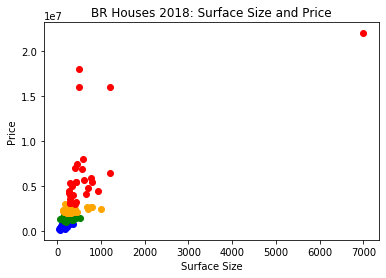

In [28]:
from matplotlib import pyplot as plt
plt.scatter(q1_house['surface_covered_in_m2'],q1_house['price'],color='blue')
plt.scatter(q2_house['surface_covered_in_m2'],q2_house['price'],color='green')
plt.scatter(q3_house['surface_covered_in_m2'],q3_house['price'],color='orange')
plt.scatter(q4_house['surface_covered_in_m2'],q4_house['price'],color='red')
plt.title(label="BR Houses 2018: Surface Size and Price", loc="center")
plt.xlabel("Surface Size")
plt.ylabel("Price")
plt.show()

In [29]:
#Remove outliers
q = q4_house['price'].quantile(0.90)
q4_house2 = q4_house[q4_house['price']<q]

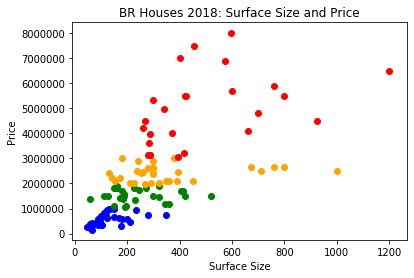

In [30]:
plt.scatter(q1_house['surface_covered_in_m2'],q1_house['price'],color='blue')
plt.scatter(q2_house['surface_covered_in_m2'],q2_house['price'],color='green')
plt.scatter(q3_house['surface_covered_in_m2'],q3_house['price'],color='orange')
plt.scatter(q4_house2['surface_covered_in_m2'],q4_house2['price'],color='red')
plt.title(label="BR Houses 2018: Surface Size and Price", loc="center")
plt.xlabel("Surface Size")
plt.ylabel("Price")
plt.show()

## Insights

#### 1. Rio de Janiero is the best state nearly by default because of the variety of houses based on surface size and price. Most notable area is the south-east coastline of the state especially the ones directly connected to Avenida Epitácio Pessoa, high-end pricing and intriguing demand based on sales volume. The farther the house from the south-east coastline, the likelihood of a cheaper house increases.

#### 2. Notable places and interesting outlier of an investment in terms of low pricing is a house in Campo Grande with a size of 212 sq. meters but a relatively low price of 450,000 BRL. And a house in  São Francisco, a realtively big house with 180 sq. meters near the east-coastlines and higly urbanized. Both categorized to Q1 (Blue), it can easily be Q2 or even Q3 based on price to surface size ratio.

#### Respective IDs: 
#### db538e0a836a3b3c04332210589241de2ee8dbd3
#### dcc2bd9a030b002e490c8dc84a4cb59cc3cb2960

#### 3.

In [31]:
br_house[(br_house.state_name == 'Espírito Santo')]

,id,operation,property_type,place_name,state_name,lat,lon,surface_covered_in_m2,floor,rooms,price,price_quartile,size_percentile


In [32]:
q_house['price_per_sqm'] = round(q_house['price']/q_house['surface_covered_in_m2'], 2)
q_house

,id,operation,property_type,place_name,state_name,lat,lon,surface_covered_in_m2,floor,rooms,price,price_quartile,size_percentile,price_per_sqm
28,0089badfd737c52dbc367a962618e2eaf2c0adba,sell,house,Senador Canedo,Goiás,-16.708196,-49.080108,67,1,2,145000.0,0,0,2164.18
101,567c2fb46e86ba128e57966b5b74e10b427621b5,sell,house,Aparecida de Goiânia,Goiás,-16.801974,-49.324109,106,1,3,350000.0,0,1,3301.89
241,0cd71ebe7c9e7de08f9a46543b3979b7728a9025,sell,house,Anil,Rio de Janeiro,-22.951729,-43.328271,414,2,3,1700000.0,1,7,4106.28
246,da37705ea9b93f87085781f75586a4f78129fd1b,sell,house,Anil,Rio de Janeiro,-22.957844,-43.334926,520,2,2,1495000.0,1,8,2875.00
247,42d84437311e25e4c3a56290f1bc90746b826461,sell,house,Anil,Rio de Janeiro,-22.962657,-43.331888,709,2,3,2500000.0,2,9,3526.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,0d6af97eea9b9de4c0a5c5749fb579d1118862e7,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.015049,-43.484823,280,1,1,750000.0,0,5,2678.57
7072,ecae97bfb6177c458d26743dbd6afb4fe7f202eb,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.016957,-43.492348,390,3,1,2100000.0,2,7,5384.62
7073,86a6455958b6a00cab10c6731d5f292927f687c2,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.016957,-43.492348,300,3,1,1500000.0,1,5,5000.00
7074,60358f9b212cee5df59b00155905bed6ddcc8f44,sell,house,Recreio dos Bandeirantes,Rio de Janeiro,-23.016957,-43.492348,380,3,2,3000000.0,2,7,7894.74


In [36]:
place_house = pd.DataFrame(q_house.groupby('place_name')['price_per_sqm'].mean()).sort_values(by=['price_per_sqm'], ascending=False)
place_house

,price_per_sqm
place_name,
Leblon,34036.070000
Lagoa,16153.850000
Ipanema,15100.390000
Flamengo,12299.226667
Urca,12179.490000
Gávea,11962.790000
Jardim Botânico,11152.776667
Botafogo,11148.341538
São Conrado,11026.707500


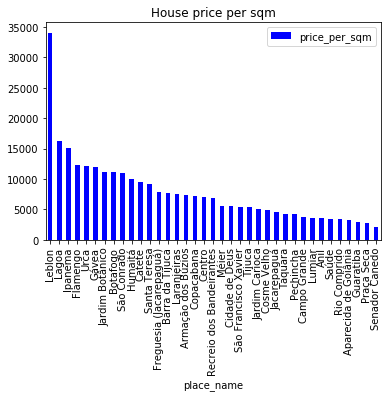

In [40]:
place_house.plot(kind='bar', color='blue', title = 'House price per sqm')

In [39]:
place_house2 = pd.DataFrame(q_house.groupby('place_name')['surface_covered_in_m2'].mean()).sort_values(by=['surface_covered_in_m2'], ascending=False)
place_house2

,surface_covered_in_m2
place_name,
São Conrado,2146.500000
Gávea,674.666667
Cosme Velho,549.250000
Anil,547.666667
Leblon,499.500000
Barra da Tijuca,496.333333
Jardim Botânico,466.666667
Copacabana,400.571429
Flamengo,364.000000


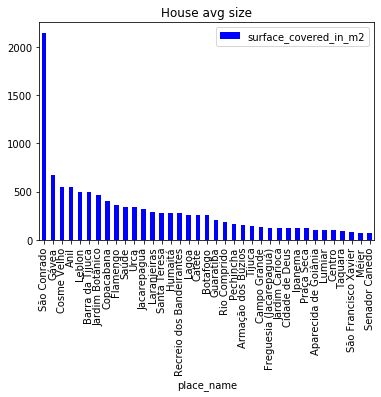

In [45]:
place_house2.plot(kind='bar', color='blue', title='House avg size')

In [43]:
place_house3 = pd.DataFrame(q_house.groupby('place_name')['price'].mean()).sort_values(by=['price'], ascending=False)
place_house3.round(2)

,price
place_name,
Leblon,17000000.00
São Conrado,10700000.00
Gávea,6333333.33
Flamengo,4663333.33
Jardim Botânico,4491666.67
Lagoa,4200000.00
Urca,3850000.00
Barra da Tijuca,3602222.22
Botafogo,3073846.15


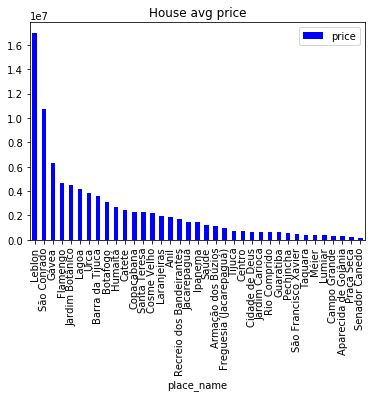

In [44]:
place_house3.round(2).plot(kind='bar', color='blue', title='House avg price')